偏差 bias   
权重 weight  
特征 feature  

导入包及模块

In [100]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

人工构造数据集

In [101]:
num_inputs=2
num_examples=1000
true_w=[2,-2.3]
true_b=4.2

features=torch.randn(num_examples,num_inputs,dtype=torch.float32)
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels += torch.tensor(np.random.normal(0,0.001),dtype=torch.float32)

数据集展示

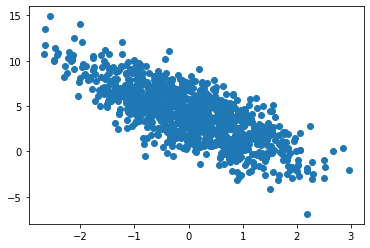

In [102]:
plt.scatter(features[:,1],labels)
plt.show()

读取指定批量的数据

In [103]:
def dataGenerator(batchSize,features,labels):
    numExamples=len(features)
    indexs=list(range(numExamples))
    random.shuffle(indexs)
    for i in range(0,numExamples,batchSize):
        j=torch.LongTensor(indexs[i:min(i+batchSize,numExamples)])
        yield features.index_select(0,j),labels.index_select(0,j)
# #测验读取一次
# for i in dataGenerator(10,features,labels):
#     print(i)
#     break

初始化模型参数

In [104]:
w=torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32,requires_grad=True)
b=torch.zeros(1,dtype=torch.float32,requires_grad=True)

定义模型

In [105]:
def lineReg(x,w,b):
    return torch.mm(x,w)+b

定义损失函数

In [106]:
def squaredLoss(yP,y):
    return (yP-y.view(yP.size()))**2/2

定义优化算法

In [107]:
def sgd(params,lr,batchSize):
    for param in params:
        param.data -= lr*param.grad / batchSize

训练模型

In [108]:
lr = 0.03
numEpochs=3
net=lineReg
loss=squaredLoss

for epochs in range(numEpochs):
    for x,y in dataGenerator(10,features,labels):
        yP=net(x,w,b)
        l = loss(yP,y).sum()
        l.backward()
        sgd([w,b],lr,10)

        w.grad.data.zero_()
        b.grad.data.zero_()
    print(epochs,loss(net(features,w,b),labels).mean().item())

0 0.03555554896593094
1 9.842371946433559e-05
2 2.7344376007931714e-07


In [109]:
print(true_w,w)

[2, -2.3] tensor([[ 1.9996],
        [-2.2997]], requires_grad=True)
